## Finance Data Reader로 주식 데이터 불러오기

참고 사이트   
https://inhovation97.tistory.com/54   
https://financedata.github.io/posts/finance-data-reader-users-guide.html

### 종목 코드 얻기

In [1]:
import pandas as pd
def make_code(x): # 6자리 숫자를 갖는 종목 코드의 특성을 위한 함수
    x = str(x)
    return '0'*(6-len(x)) + x

code_data = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
code_data['종목코드'] = code_data['종목코드'].apply(make_code)
code_list = code_data[code_data['상장일'] < '2017-01-01']['종목코드']
code_data.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
2,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
3,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
4,DS단석,017860,기타 화학제품 제조업,바이오에너지,2023-12-22,12월,한승욱,http://dsdansuk.com,경기도


In [2]:
len(code_data)

2669

## 특정 종목 불러오기

In [3]:
!pip install -U finance-datareader

In [4]:
import FinanceDataReader as fdr
fdr.DataReader('095570', start = '2015', end = '2017')  # symbol = 종목명, start = 시작 날짜, end = 종료 날짜
                                                        # 시작 날짜부터 종료 날짜까지 해당 종목 코드의 종목 데이터를 가져온다

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-08-21,6180,7300,5600,7100,1994022,NaN
2015-08-24,6700,6940,6240,6480,392831,-0.087324
2015-08-25,6610,6730,6189,6220,242730,-0.040123
2015-08-26,6260,7760,6260,7090,703721,0.139871
2015-08-27,7239,8060,6960,7570,499913,0.067701
...,...,...,...,...,...,...
2016-12-23,6139,6370,6120,6270,30654,0.026187
2016-12-26,6270,6490,6260,6400,47068,0.020734
2016-12-27,6360,6500,6310,6500,64523,0.015625


In [5]:
code_list = code_data['종목코드'].to_list()
code_list[:10], len(code_list) # code_list: 2,500여개의 기업의 종목 코드를 담은 리스트

(['095570',
  '282330',
  '138930',
  '155660',
  '017860',
  '009540',
  '322000',
  '001390',
  '033180',
  '025000'],
 2669)

In [6]:
# 전체 데이터를 가져오는 부분

# from tqdm import tqdm
# import time
# start_time = time.time()

# merge_stock_list =[]
# for code in tqdm(code_list): # code_list는 2,500여개의 종목 코드가 담긴 리스트
#     stock_list = fdr.DataReader(code, '2020').reset_index().values.tolist() # fdr로 불러온 주가 데이터프레임을 리스트로 변형

#     for row in stock_list:                   # 불러온 주가 데이터를 1줄씩 불러옴
#         row.append(code)                      # 주가 데이터에 기업 코드를 추가
#         merge_stock_list.append(row)          # 모든 기업의 데이터를 병합

# end_time = time.time()
# print('--- 걸린시간: {} ---'.format(end_time - start_time))

In [7]:
# 삼성전자
df = fdr.DataReader('005930', start = '2017', end='2024')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


In [8]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-12-21,74600,75000,74300,75000,13478766,0.002674
2023-12-22,75800,76300,75400,75900,14515608,0.012000
2023-12-26,76100,76700,75700,76600,13164909,0.009223
2023-12-27,76700,78000,76500,78000,20651042,0.018277
2023-12-28,77700,78500,77500,78500,17797536,0.006410


In [9]:
df.info() # 2017년부터 2023년까지 1720일의 데이터를 포함

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1720 entries, 2017-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1720 non-null   int64  
 1   High    1720 non-null   int64  
 2   Low     1720 non-null   int64  
 3   Close   1720 non-null   int64  
 4   Volume  1720 non-null   int64  
 5   Change  1720 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 94.1 KB


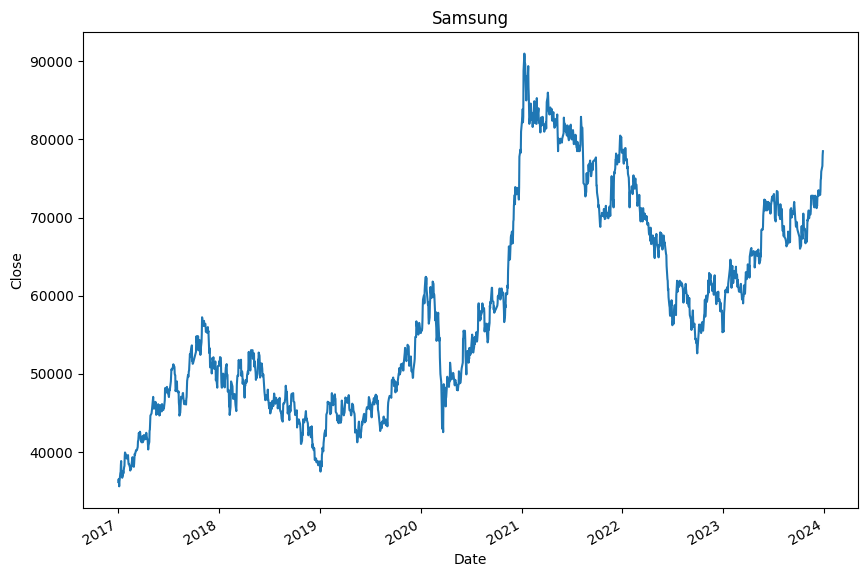

In [15]:
# 삼성 전자의 종가 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
df['Close'].plot()
plt.ylabel("Close")
plt.xlabel("Date")
plt.title("Samsung")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Close', axis=1), df.Close, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1376, 5), (344, 5), (1376,), (344,))

In [38]:
train = df.loc[:'2023-01-01']
test = df.loc['2023-01-01':]
len(train), len(test)

(1475, 245)

In [39]:
train.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454
2022-12-28,57600,57600,56400,56600,14665410,-0.025818
2022-12-29,56000,56200,55300,55300,11295935,-0.022968


In [40]:
test.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-02,55500,56100,55200,55500,10031448,0.003617
2023-01-03,55400,56000,54500,55400,13547030,-0.001802
2023-01-04,55700,58000,55600,57800,20188071,0.043321
2023-01-05,58200,58800,57600,58200,15682826,0.006920
2023-01-06,58300,59400,57900,59000,17334989,0.013746


In [41]:
X_train = train.drop("Close", axis=1)
y_train = train['Close']
X_test = test.drop("Close", axis=1)
y_test = test['Close']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1475, 5), (1475,), (245, 5), (245,))

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model= RandomForestRegressor(random_state=0,max_depth=10,n_estimators=500)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print(mse)
## RMSE - 435정도

189475.5370741295


<Axes: xlabel='Date'>

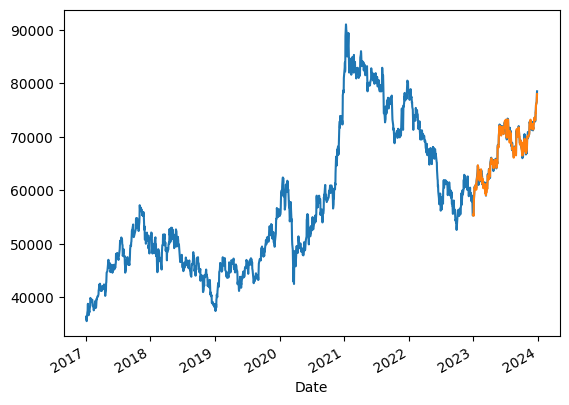

In [54]:
df['Close'].plot()
pd.Series(y_pred, index=y_test.index).plot()

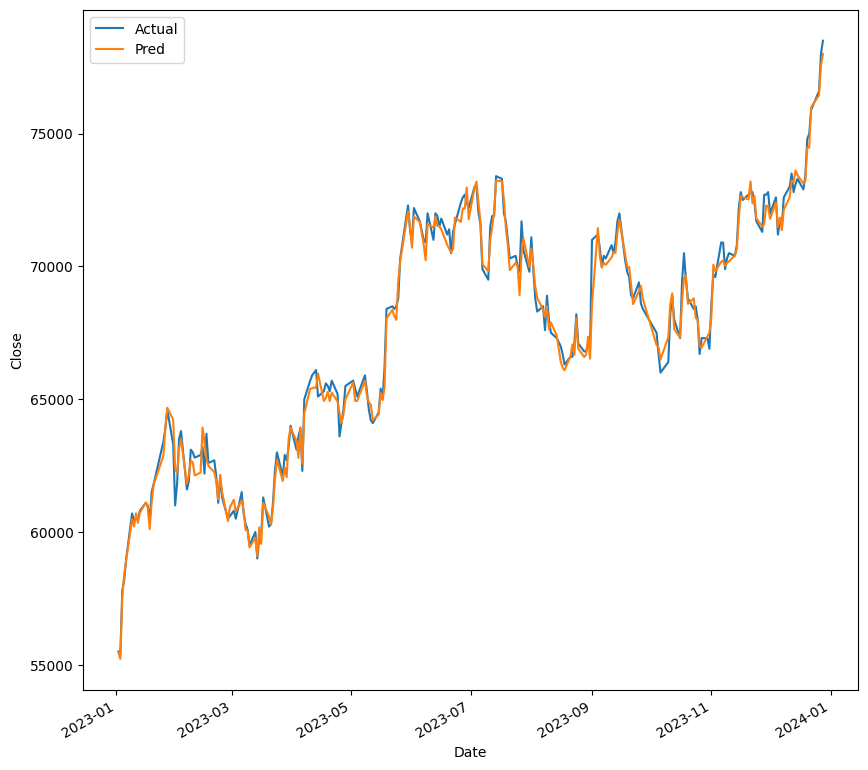

In [60]:
plt.figure(figsize=(10, 10))
test['Close'].plot(label='Actual')
pd.Series(y_pred, index=y_test.index).plot(label='Pred')
plt.ylabel("Close")
plt.xlabel("Date")
plt.legend()
plt.show()